In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from seaborn import heatmap
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("train_ver2.csv.zip")

In [3]:
data.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
# column names
data.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [40]:
data.columns

Index(['fetch_date', 'cust_code', 'emp_index', 'country', 'sex', 'age',
       'cust_date', 'new_cust', 'cust_seniority', 'indrel',
       'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index',
       'foreigner_index', 'spouse_index', 'joining_channel', 'deceased',
       'address_type', 'prov_code', 'prov_name', 'activity_index', 'income',
       'segmentation', 'savings_account', 'guarentees', 'current_account',
       'derivative_account', 'payroll_account', 'junior_account',
       'mas_account', 'perticular_account', 'perticular_plus', 'st_deposit',
       'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
       'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account',
       'payroll', 'pension2', 'direct_debit'],
      dtype='object')

In [5]:
# total data 
data.shape

(13647309, 48)

In [6]:
#unique customers
len(data.ncodpers.unique())

956645

In [7]:
# renaming columns
new_column_name = ['fetch_date', 'cust_code', 'emp_index', 'country', 'sex', 'age', 'cust_date', 'new_cust', 'cust_seniority',
'indrel', 'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index',
'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index', 'income', 'segmentation', 
'savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit'
]
data.columns = new_column_name

In [8]:
print("updates column names\n",data.columns)

updates column names
 Index(['fetch_date', 'cust_code', 'emp_index', 'country', 'sex', 'age',
       'cust_date', 'new_cust', 'cust_seniority', 'indrel',
       'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index',
       'foreigner_index', 'spouse_index', 'joining_channel', 'deceased',
       'address_type', 'prov_code', 'prov_name', 'activity_index', 'income',
       'segmentation', 'savings_account', 'guarentees', 'current_account',
       'derivative_account', 'payroll_account', 'junior_account',
       'mas_account', 'perticular_account', 'perticular_plus', 'st_deposit',
       'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
       'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account',
       'payroll', 'pension2', 'direct_debit'],
      dtype='object')


In [ ]:

data.sort(on=['cust'])

In [9]:
data.head()

,fetch_date,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,...,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [ ]:
data

In [10]:
# missing values
data.isnull().sum()

fetch_date                     0
cust_code                      0
emp_index                  27734
country                    27734
sex                        27804
age                            0
cust_date                  27734
new_cust                   27734
cust_seniority                 0
indrel                     27734
last_date_as_primary    13622516
cust_type                 149781
cust_rel                  149781
residence_index            27734
foreigner_index            27734
spouse_index            13645501
joining_channel           186126
deceased                   27734
address_type               27735
prov_code                  93591
prov_name                  93591
activity_index             27734
income                   2794375
segmentation              189368
savings_account                0
guarentees                     0
current_account                0
derivative_account             0
payroll_account                0
junior_account                 0
mas_accoun

In [29]:
def missing_value_treatment(data, null_columns, target_columns):
    for column in null_columns:
        if column not in target_columns:
            print("processing : " ,column)
            custs = data.cust_code[data[column].isna()].unique()
            print('Number of customers whose {} data is missing is {}'.format(column, custs.shape[0]))
            available_custs = data.cust_code[(~data[column].isna()) & (data.cust_code.isin(custs))].unique()
            print('Number of customers whose data is present elsewhere is {}'.format(available_custs.shape[0]))
            dummy = data[data.cust_code.isin(available_custs)]
            data = data[~data.cust_code.isin(available_custs)]

            available_values = dummy[(dummy.cust_code.isin(available_custs))&(~dummy[column].isna())].groupby(by='cust_code')[column].first()
            available_dict = dict(zip(available_values.index, available_values.values))
            dummy[column][(dummy.cust_code.isin(available_custs))&(dummy[column].isna())] = dummy['cust_code'][(dummy.cust_code.isin(available_custs))&(dummy[column].isna())].map(available_dict)
            print('processed', column)
            data = pd.concat([data,dummy])
            print('-'*100)
        else:
            print('preprocessing', column)
            print('filling na values with 0')

            dummy = data[data[column].isna()]
            dummy[column] = 0
            data = data[~data[column].isna()]
            data = pd.concat([data,dummy])
            print('processed', column)
            print('-'*100)
    return data

In [30]:
#Target columns
target_columns = ['savings_account', 'guarentees', 'current_account', 'derivative_account', 'payroll_account', 'junior_account', 'mas_account',
'perticular_account', 'perticular_plus', 'st_deposit', 'mt_deposits', 'lt_deposits', 'e_account', 'funds', 'mortgage',
 'pension', 'loan', 'tax', 'credit_card', 'securities', 'home_account', 'payroll', 'pension2', 'direct_debit']

user_features = ['fetch_date', 'cust_code', 'emp_index', 'country', 'sex', 'age', 'cust_date', 'new_cust', 'cust_seniority',
'indrel', 'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index',
'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index', 'income', 'segmentation']

In [31]:
null_columns = data.isna().sum()[data.isna().sum()>0].index

In [32]:
null_columns

Index(['emp_index', 'country', 'sex', 'cust_date', 'new_cust', 'indrel',
       'last_date_as_primary', 'cust_type', 'cust_rel', 'residence_index',
       'foreigner_index', 'spouse_index', 'joining_channel', 'deceased',
       'address_type', 'prov_code', 'prov_name', 'activity_index', 'income',
       'segmentation', 'payroll', 'pension2'],
      dtype='object')

In [33]:
data = missing_value_treatment(data,null_columns,target_columns)

processing :  emp_index
Number of customers whose emp_index data is missing is 7340
Number of customers whose data is present elsewhere is 309
processed emp_index
----------------------------------------------------------------------------------------------------
processing :  country
Number of customers whose country data is missing is 7340
Number of customers whose data is present elsewhere is 309
processed country
----------------------------------------------------------------------------------------------------
processing :  sex
Number of customers whose sex data is missing is 7345
Number of customers whose data is present elsewhere is 309
processed sex
----------------------------------------------------------------------------------------------------
processing :  cust_date
Number of customers whose cust_date data is missing is 7340
Number of customers whose data is present elsewhere is 309
processed cust_date
---------------------------------------------------------------------

-----------------------------------------

## All purchases

In [35]:
data

,fetch_date,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,...,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146593,2015-04-28,407854,N,ES,V,NA,2003-02-19,1.0,NA,99.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2302356,2015-04-28,1394072,N,ES,V,NA,2015-04-27,1.0,NA,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2711602,2015-05-28,1369095,N,ES,V,NA,2014-12-15,1.0,NA,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2713811,2015-05-28,1376219,N,ES,V,NA,2015-01-14,1.0,NA,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [37]:
new_purchases = data[['cust_code', 'fetch_date']+target_columns]

new_purchases = new_purchases.fillna(0)
new_purchases[target_columns] = new_purchases[target_columns].astype('uint8')
new_purchases = new_purchases.sort_values(['cust_code', 'fetch_date'])


new_purchases = new_purchases[(new_purchases[target_columns].sum(axis=1) > 0)]

new_purchases = data[user_features].merge(new_purchases, on = ['fetch_date', 'cust_code'], how='right')

new_purchases

,fetch_date,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,...,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,2015-01-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,1,1,0,0,0,0
1,2015-02-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,0,1,0,0,0,0
2,2015-03-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,0,1,0,0,0,0
3,2015-04-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,0,1,0,0,0,0
4,2015-05-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11091065,2016-05-28,1553541,N,ES,V,54,2016-05-31,1.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
11091066,2016-05-28,1553552,N,ES,H,35,2016-05-31,1.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
11091067,2016-05-28,1553559,N,ES,H,43,2016-05-31,1.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
11091068,2016-05-28,1553565,N,ES,H,68,2016-05-31,1.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
new_purchases.to_csv('new_purchases_v2.csv')

In [34]:
user_data = data.drop_duplicates(subset=['cust_code'], keep='last')[['fetch_date','cust_code', 'emp_index', 'country', 'sex', 'age', 'cust_date', 'new_cust', 'cust_seniority',
                  'indrel', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index',
                  'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index',
                  'income', 'segmentation']]

user_data

,fetch_date,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,...,residence_index,foreigner_index,joining_channel,deceased,address_type,prov_code,prov_name,activity_index,income,segmentation
8484,2015-01-28,1047948,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12899,2015-01-28,1069441,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16831,2015-01-28,1058093,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24678,2015-01-28,1016670,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41186,2015-01-28,1104775,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146593,2015-04-28,407854,N,ES,V,NA,2003-02-19,1.0,NA,99.0,...,S,N,KHN,N,1.0,26.0,"RIOJA, LA",0.0,49531.41,02 - PARTICULARES
2302356,2015-04-28,1394072,N,ES,V,NA,2015-04-27,1.0,NA,1.0,...,S,N,KHM,N,1.0,27.0,LUGO,1.0,85008.78,03 - UNIVERSITARIO
2711602,2015-05-28,1369095,N,ES,V,NA,2014-12-15,1.0,NA,1.0,...,S,N,KHM,N,1.0,19.0,GUADALAJARA,1.0,61756.56,02 - PARTICULARES
2713811,2015-05-28,1376219,N,ES,V,NA,2015-01-14,1.0,NA,1.0,...,S,N,KHM,N,1.0,41.0,SEVILLA,0.0,114618.48,02 - PARTICULARES


In [35]:
user_data = data.drop_duplicates(subset=['cust_code'], keep='last')[['fetch_date','cust_code', 'emp_index', 'country', 'sex', 'age', 'cust_date', 'new_cust', 'cust_seniority',
                  'indrel', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index',
                  'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index',
                  'income', 'segmentation']]

user_purchases = data[['cust_code']+target_columns].groupby(by='cust_code').sum()

user_features = user_data.merge(user_purchases, on='cust_code', how='right')

In [38]:
user_data

,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,cust_type,...,foreigner_index,spouse_index,joining_channel,deceased,address_type,prov_code,prov_name,activity_index,income,segmentation
8484,1047948,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12899,1069441,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16831,1058093,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24678,1016670,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41186,1104775,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146593,407854,N,ES,V,NA,2003-02-19,1.0,NA,99.0,3.0,...,N,NaN,KHN,N,1.0,26.0,"RIOJA, LA",0.0,49531.41,02 - PARTICULARES
2302356,1394072,N,ES,V,NA,2015-04-27,1.0,NA,1.0,3.0,...,N,NaN,KHM,N,1.0,27.0,LUGO,1.0,85008.78,03 - UNIVERSITARIO
2711602,1369095,N,ES,V,NA,2014-12-15,1.0,NA,1.0,3.0,...,N,NaN,KHM,N,1.0,19.0,GUADALAJARA,1.0,61756.56,02 - PARTICULARES
2713811,1376219,N,ES,V,NA,2015-01-14,1.0,NA,1.0,3,...,N,NaN,KHM,N,1.0,41.0,SEVILLA,0.0,114618.48,02 - PARTICULARES


In [39]:
user_purchases

,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,perticular_plus,st_deposit,...,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
cust_code,,,,,,,,,,,,,,,,,,,,,
15889,0,0,17,0,0,0,0,0,17,0,...,0,0,0,0,8,17,0,0.0,0.0,0
15890,0,0,0,0,17,0,0,0,17,0,...,0,17,0,0,17,0,0,17.0,17.0,17
15891,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
15892,0,0,12,0,5,0,0,0,0,0,...,0,0,0,17,17,17,0,0.0,0.0,17
15893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
1553686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
1553687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [40]:
user_features

,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,cust_type,...,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,15889,F,ES,V,56,1995-01-16,0.0,255,1.0,1.0,...,0,0,0,0,8,17,0,0.0,0.0,0
1,15890,A,ES,V,63,1995-01-16,0.0,256,1.0,1.0,...,0,17,0,0,17,0,0,17.0,17.0,17
2,15891,N,ES,H,59,2015-07-28,0.0,246,99.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,15892,F,ES,H,62,1995-01-16,0.0,256,1.0,1.0,...,0,0,0,17,17,17,0,0.0,0.0,17
4,15893,N,ES,V,63,1997-10-03,0.0,256,1.0,1.0,...,0,0,0,0,0,17,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956640,1553685,N,ES,V,52,2016-05-31,1.0,0,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
956641,1553686,N,ES,H,30,2016-05-31,1.0,0,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
956642,1553687,N,ES,V,21,2016-05-31,1.0,0,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
956643,1553688,N,ES,H,43,2016-05-31,1.0,0,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0


In [41]:
user_features.to_csv('all_purchases.csv')

------------------------------------------------

In [54]:
data.isnull().sum()

fetch_date                     0
cust_code                      0
emp_index                  26685
country                    26685
sex                        26755
age                            0
cust_date                  26685
new_cust                   26685
cust_seniority                 0
indrel                     26685
last_date_as_primary    13516630
cust_type                  34340
cust_rel                   34340
residence_index            26685
foreigner_index            26685
spouse_index            13644450
joining_channel            58588
deceased                   26685
address_type               26685
prov_code                  91856
prov_name                  91856
activity_index             26685
income                   2794196
segmentation               60452
savings_account                0
guarentees                     0
current_account                0
derivative_account             0
payroll_account                0
junior_account                 0
mas_accoun

In [55]:
data.groupby(['fetch_date']).size()

fetch_date
2015-01-28    625457
2015-02-28    627394
2015-03-28    629209
2015-04-28    630367
2015-05-28    631957
2015-06-28    632110
2015-07-28    829817
2015-08-28    843201
2015-09-28    865440
2015-10-28    892251
2015-11-28    906109
2015-12-28    912021
2016-01-28    916269
2016-02-28    920904
2016-03-28    925076
2016-04-28    928274
2016-05-28    931453
dtype: int64

In [56]:
data.groupby(['cust_date']).size()

cust_date
1995-01-16    1226
1995-01-17      17
1995-01-23      28
1995-01-31      28
1995-02-02      34
              ... 
2016-05-27     122
2016-05-28      54
2016-05-29      70
2016-05-30     203
2016-05-31     157
Length: 6756, dtype: int64

In [ ]:
# old data is present 
# removing data not in time scope
# remove data repeated - bought once but repeatd in all other months

In [58]:
dummy = pd.DataFrame(
    {
        'cust_code': data.cust_code.unique(),
        'fetch_date': '2014-12-28'
    }
)

dummy

,cust_code,fetch_date
0,1375586,2014-12-28
1,1050611,2014-12-28
2,1050612,2014-12-28
3,1050613,2014-12-28
4,1050614,2014-12-28
...,...,...
956640,684507,2014-12-28
956641,482659,2014-12-28
956642,435837,2014-12-28
956643,553680,2014-12-28


In [59]:
new_purchases = pd.concat([data[['cust_code', 'fetch_date']+target_columns], dummy])
new_purchases

,cust_code,fetch_date,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,...,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,1375586,2015-01-28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1050611,2015-01-28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1050612,2015-01-28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1050613,2015-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1050614,2015-01-28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956640,684507,2014-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
956641,482659,2014-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
956642,435837,2014-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
956643,553680,2014-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
new_purchases = new_purchases.fillna(0)

In [62]:
new_purchases[target_columns] = new_purchases[target_columns].astype('uint8')
new_purchases

,cust_code,fetch_date,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,...,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,1375586,2015-01-28,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1050611,2015-01-28,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1050612,2015-01-28,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1050613,2015-01-28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1050614,2015-01-28,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956640,684507,2014-12-28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
956641,482659,2014-12-28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
956642,435837,2014-12-28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
956643,553680,2014-12-28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
new_purchases = new_purchases.sort_values(['cust_code','fetch_date'])

In [64]:
new_purchases

,cust_code,fetch_date,savings_account,guarentees,current_account,derivative_account,payroll_account,junior_account,mas_account,perticular_account,...,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
410421,15889,2014-12-28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416965,15889,2015-01-28,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
836224,15889,2015-02-28,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1673961,15889,2015-03-28,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1882060,15889,2015-04-28,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13336816,1553687,2016-05-28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
814896,1553688,2014-12-28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13336815,1553688,2016-05-28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
814895,1553689,2014-12-28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
vals = np.array(new_purchases[target_columns].values, dtype = 'int8')
vals

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [71]:
vals[1:] = vals[1:] - vals[:-1] # stopped using product (next month - current month)

In [72]:
new_purchases[target_columns] = vals

In [73]:
new_purchases = new_purchases[~new_purchases.fetch_date.isin(['2014-12-28','2015-01-28'])]

In [74]:
# removing discontinued transanctions
for col in target_columns:
    new_purchases[col][new_purchases[col]<0]=0

In [75]:
new_purchases = new_purchases[(new_purchases[target_columns].sum(axis=1)>0)]

In [78]:
#combining data
new_purchases = data[user_features].merge(new_purchases, on=['fetch_date','cust_code'], how = 'right')

In [79]:
new_purchases

,fetch_date,cust_code,emp_index,country,sex,age,cust_date,new_cust,cust_seniority,indrel,...,mortgage,pension,loan,tax,credit_card,securities,home_account,payroll,pension2,direct_debit
0,2015-05-28,15889,F,ES,V,56,1995-01-16,0.0,245,1.0,...,0,0,0,0,1,0,0,0,0,0
1,2015-12-28,15889,F,ES,V,56,1995-01-16,0.0,250,1.0,...,0,0,0,0,1,0,0,0,0,0
2,2016-03-28,15889,F,ES,V,56,1995-01-16,0.0,253,1.0,...,0,0,0,0,1,0,0,0,0,0
3,2016-05-28,15889,F,ES,V,56,1995-01-16,0.0,255,1.0,...,0,0,0,0,1,0,0,0,0,0
4,2015-07-28,15891,N,ES,H,59,2015-07-28,0.0,246,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547325,2016-05-28,1553541,N,ES,V,54,2016-05-31,1.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
547326,2016-05-28,1553552,N,ES,H,35,2016-05-31,1.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
547327,2016-05-28,1553559,N,ES,H,43,2016-05-31,1.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
547328,2016-05-28,1553565,N,ES,H,68,2016-05-31,1.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# user dataset with fixed data points - assumptions
user_data = new_purchases.drop_duplicates(subset=['cust_code'], keep='last')[['cust_code', 'emp_index', 'country', 'sex', 'age', 'cust_date', 'new_cust', 'cust_seniority',
                  'indrel', 'cust_type', 'cust_rel', 'residence_index', 'foreigner_index', 'spouse_index',
                  'joining_channel', 'deceased', 'address_type', 'prov_code','prov_name', 'activity_index',
                  'income', 'segmentation']]
user_purchases = new_purchases[['cust_code']+target_columns].groupby(by='cust_code').sum()

user_features = user_data.merge(user_purchases, on='cust_code', how='right')

In [93]:
new_purchases.to_csv("new_purchases.csv")

In [91]:
# saving copy of the data created
user_data.to_csv("user_data.csv")
user_purchases.to_csv("user_purchases.csv")
user_features.to_csv("user_features.csv")

# EDA

In [94]:
new_purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547330 entries, 0 to 547329
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   fetch_date            547330 non-null  object 
 1   cust_code             547330 non-null  int64  
 2   emp_index             546656 non-null  object 
 3   country               546656 non-null  object 
 4   sex                   546652 non-null  object 
 5   age                   547330 non-null  object 
 6   cust_date             546656 non-null  object 
 7   new_cust              546656 non-null  float64
 8   cust_seniority        547330 non-null  object 
 9   indrel                546656 non-null  float64
 10  last_date_as_primary  8265 non-null    object 
 11  cust_type             545135 non-null  object 
 12  cust_rel              545135 non-null  object 
 13  residence_index       546656 non-null  object 
 14  foreigner_index       546656 non-null  object 
 15  

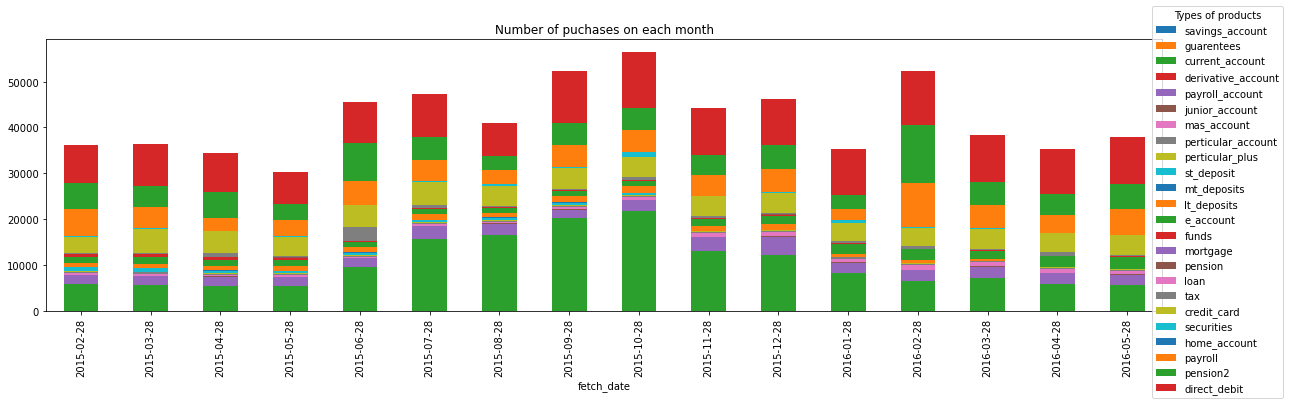

In [144]:
# monthly purchases
for_plot = new_purchases[['fetch_date']+target_columns].groupby('fetch_date').sum()
for_plot.plot(kind='bar',stacked = True, figsize = (20,5))
plt.legend(loc='center',title = 'Types of products',bbox_to_anchor=(1.05, 0.4))
plt.title("Number of puchases on each month")
plt.show()

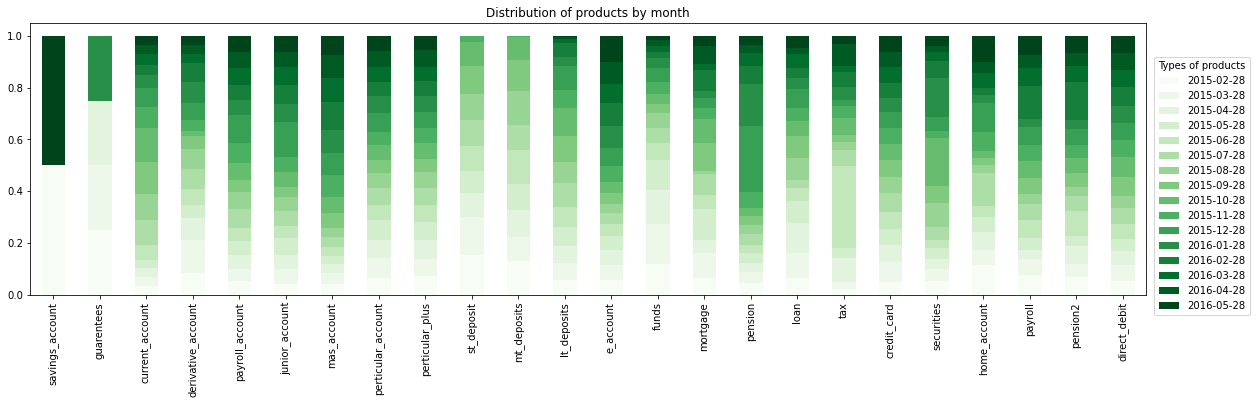

In [143]:
for_plot = new_purchases[['fetch_date']+target_columns].groupby('fetch_date').sum()
for_plot = for_plot/for_plot.sum()
#print(for_plot)
#print('before transpose')
for_plot = for_plot.T
#print(for_plot)
for_plot.plot(kind='bar',stacked = True, colormap = 'Greens', figsize = (20,5))
plt.legend(loc='center',title = 'Types of products',bbox_to_anchor=(1.05, 0.4))
plt.title("Distribution of products by month")
plt.show()

- Saving account and gaurentees are brought very less
- short, medium term deposits are stopped after 2015 - same can be said for funds
- pension increased after july
- direct debit has no trend
- tax is very high in one month (ITR?)

### Emp index

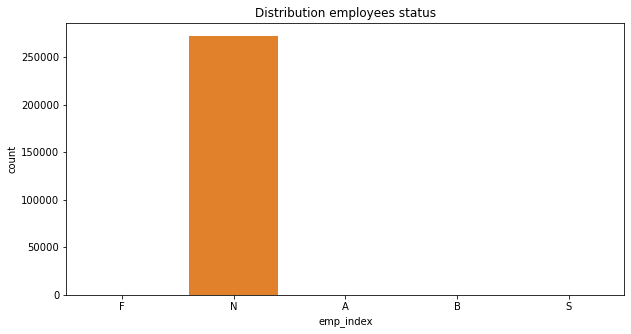

In [147]:
plt.figure(figsize = (10,5))
plt.title("Distribution employees status")
sn.countplot(user_features['emp_index'])
plt.show()

In [148]:
print("unemployed (N) is very high ",user_features['emp_index'].value_counts()['N']/user_features.shape[0])

unemployed (N) is very high  0.9968513115258859


- % of not employed is very high almost entire data is them

### Customer country

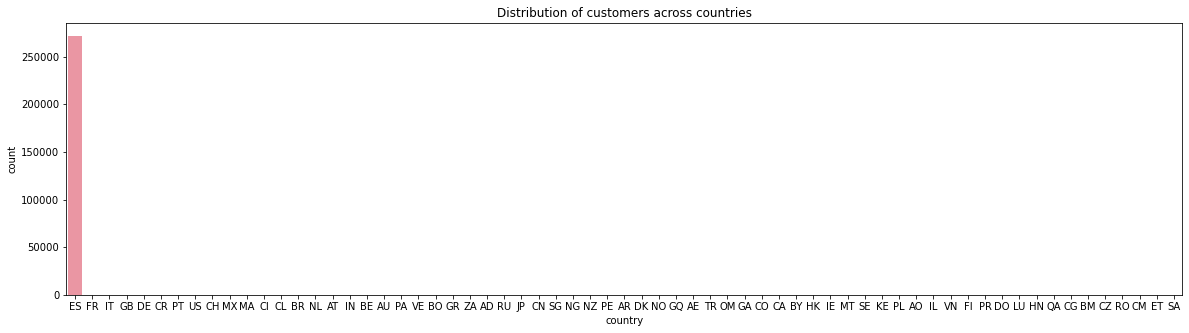

In [153]:
plt.figure(figsize = (20,5))
plt.title("Distribution of customers across countries")
sn.countplot(user_features['country'])
plt.show()

In [152]:
print("ES is very high ",user_features['country'].value_counts()['ES']/user_features.shape[0])

ES is very high  0.995828629239183


- very few foreigners 

### Gender

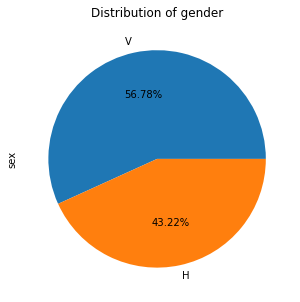

In [163]:
plt.figure(figsize = (20,5))
plt.title("Distribution of gender")
user_features.sex.value_counts().plot(kind='pie',autopct = '%1.2f%%')
plt.show()

<AxesSubplot:ylabel='None'>

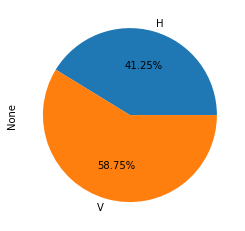

In [171]:
purchases = user_features.groupby('sex').sum()[target_columns].sum(axis=1)
purchases.plot(kind='pie',autopct='%1.2f%%')

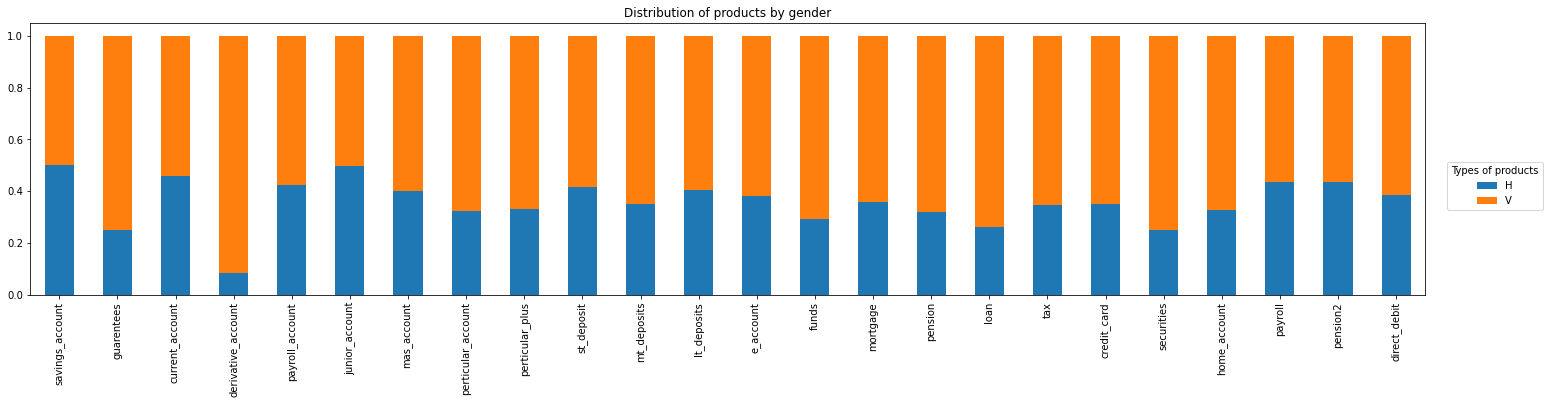

In [178]:
p = user_features.groupby('sex')[target_columns].sum()
p = p/p.sum()
p = p.T

p.plot(kind='bar', stacked = True,figsize=(25,5))
plt.legend(loc='center',title = 'Types of products',bbox_to_anchor=(1.05, 0.4))
plt.title("Distribution of products by gender")
plt.show()

In [175]:
p

sex,H,V
savings_account,0.500000,0.500000
guarentees,0.250000,0.750000
current_account,0.459534,0.540466
derivative_account,0.085106,0.914894
payroll_account,0.424732,0.575268
junior_account,0.496855,0.503145
mas_account,0.400867,0.599133
perticular_account,0.322614,0.677386
perticular_plus,0.333196,0.666804
st_deposit,0.416942,0.583058


- v gender is bought most products
- proporation is similar

### Age

In [180]:
print("missing age proportion", len(user_features[user_features.age == ' NA'])/user_features.shape[0])

missing age proportion 0.0022836238875122796


- replace with median - mean might skew the data

In [184]:
user_features[user_features.age == ' NA'] = np.median(np.median(np.array(user_features.age[user_features.age != ' NA'], dtype = int)))

In [185]:
user_features.age = user_features.age.astype('int')

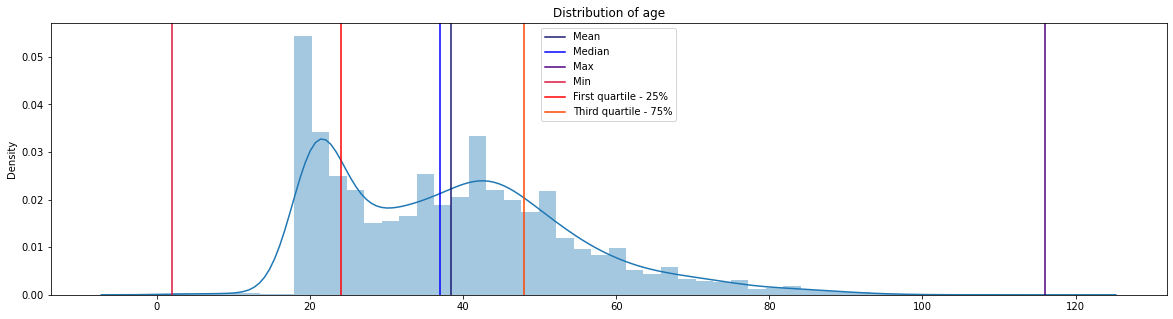

In [188]:
plt.figure(figsize = (20,5))
plt.title('Distribution of age')
series = np.array(user_features.age, dtype  = int)
sn.distplot(series, hist = True, bins = 50, kde_kws = {'bw':.2})
plt.axvline(series.mean(),color='midnightblue',label='Mean')    
plt.axvline(np.median(series),color='blue',label='Median')
plt.axvline(series.max(),color='indigo',label='Max')
plt.axvline(series.min(),color='crimson',label='Min')
plt.axvline(np.quantile(series, 0.25),color='red',label='First quartile - 25%')
plt.axvline(np.quantile(series, 0.75),color='orangered',label='Third quartile - 75%')
plt.legend()
plt.show()

In [ ]:
# same plot with mean median mode

In [201]:
df = pd.DataFrame(columns = ['age','product'])
for col in target_columns:
    df1 = pd.DataFrame({'age':user_features.age[user_features[col]==1], 'product':col})
    df = pd.concat([df, df1])

In [211]:
print(df.columns[0])
print(df.columns[1])
df.info()
df.age = df.age.astype(int)

age
product
<class 'pandas.core.frame.DataFrame'>
Int64Index: 364341 entries, 4944 to 272604
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   age      364341 non-null  object
 1   product  364341 non-null  object
dtypes: object(2)
memory usage: 8.3+ MB


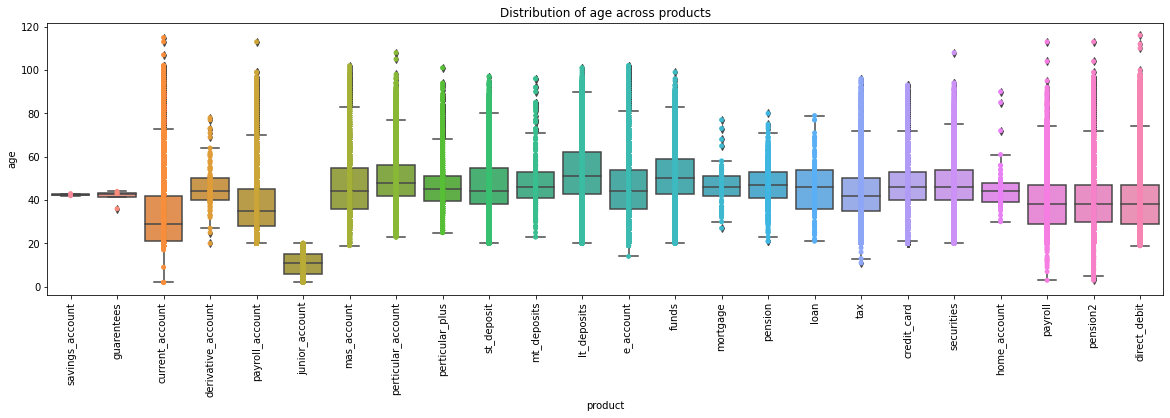

In [216]:
plt.figure(figsize = (20,5))
plt.title("Distribution of age across products")
sn.stripplot(x=df.columns[1], y = df.columns[0],data = df, jitter = False, dodge=True)
sn.boxplot(x=df.columns[1], y = df.columns[0], data = df)
plt.xticks(rotation = 90)
plt.show()

- products are mostly bouth by students, working class around 40
- junior account is mostly below 20
- savings and gaurentees are non-existent

### new customers

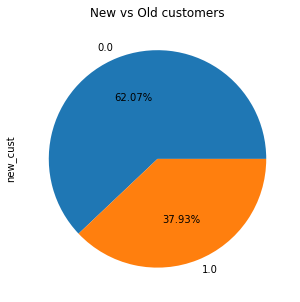

In [222]:
plt.figure(figsize = (10,5))
plt.title('New vs Old customers')
user_features.new_cust[user_features.new_cust != 37.0].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')
plt.show()

<AxesSubplot:ylabel='None'>

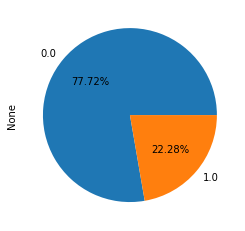

In [224]:
purchases = user_features[user_features.new_cust != 37.0].groupby('new_cust').sum()[target_columns].sum(axis=1)
purchases.plot(kind='pie',autopct='%1.2f%%')

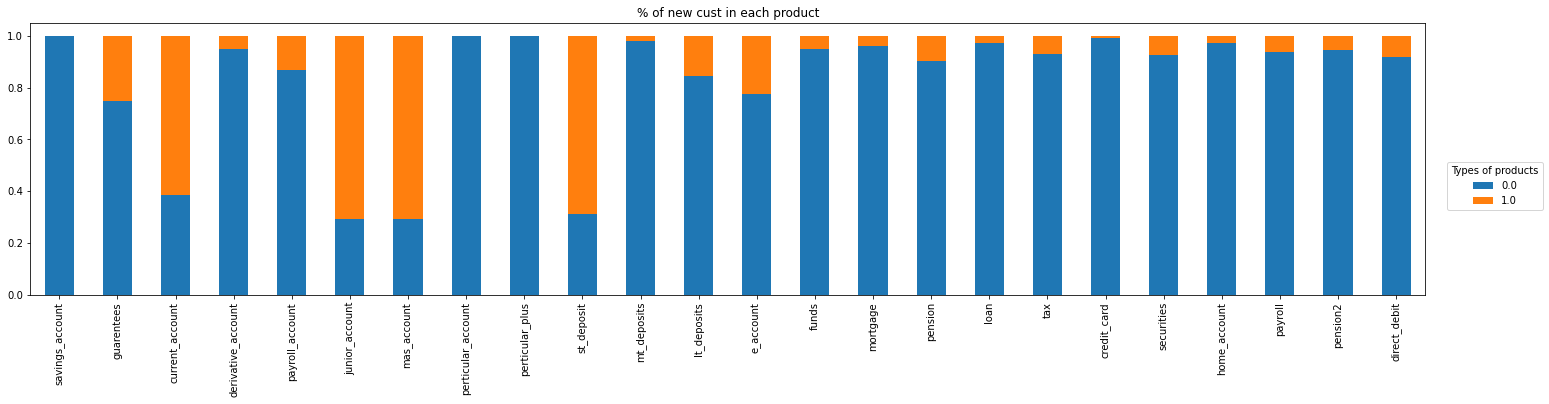

In [225]:
p = user_features[user_features.new_cust != 37.0].groupby('new_cust')[target_columns].sum()
p = p/p.sum()
p = p.T

p.plot(kind='bar', stacked = True,figsize=(25,5))
plt.legend(loc='center',title = 'Types of products',bbox_to_anchor=(1.05, 0.4))
plt.title("% of new cust in each product")
plt.show()

- new cust are ove 35% but purchases is not good only 20%
- gauratees, current account, junior_account, mas_account, st-deposits are popular among new customers
- new customers didn't by savings, perticular, perticular plus accounts

### customer seniority

In [240]:
print("missing age proportion", len(user_features[user_features.cust_seniority == '     NA'] | (user_features.cust_seniority == -999999.0))/user_features.shape[0])

missing age proportion 0.0


In [241]:
user_features.cust_seniority[(user_features.cust_seniority == '     NA') | (user_features.cust_seniority == -999999.0)] = np.median(np.array(user_features.age[user_features.cust_seniority != '     NA'], dtype=int))
user_features.cust_seniority = user_features.cust_seniority.astype(float)

In [242]:
user_features.cust_seniority[(user_features.cust_seniority == -999999)] 

Series([], Name: cust_seniority, dtype: float64)

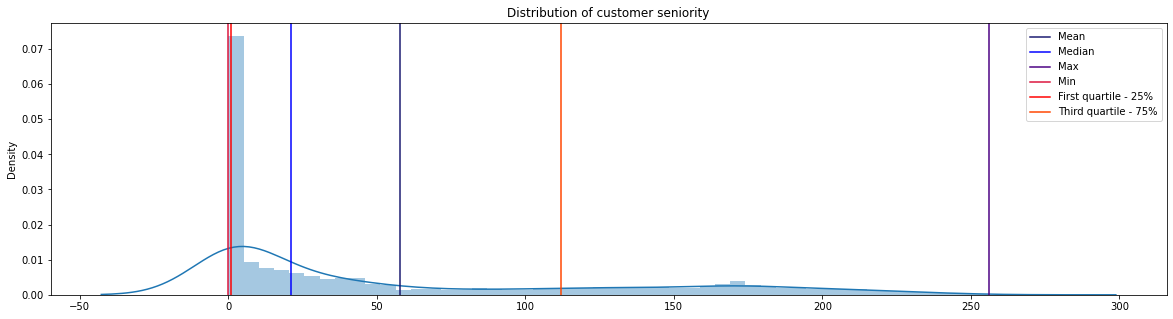

In [243]:
plt.figure(figsize = (20,5))
plt.title('Distribution of customer seniority')
series = np.array(user_features.cust_seniority, dtype  = int)
sn.distplot(series, hist = True, bins = 50, kde_kws = {'bw':.2})
plt.axvline(series.mean(),color='midnightblue',label='Mean')  
plt.axvline(np.median(series),color='blue',label='Median')
plt.axvline(series.max(),color='indigo',label='Max')
plt.axvline(series.min(),color='crimson',label='Min')
plt.axvline(np.quantile(series, 0.25),color='red',label='First quartile - 25%')
plt.axvline(np.quantile(series, 0.75),color='orangered',label='Third quartile - 75%')
plt.legend()
plt.show()

In [253]:
df = pd.DataFrame(columns = ['cust_seniority','product'])
for col in target_columns:
    df1 = pd.DataFrame({'cust_seniority':user_features.cust_seniority[user_features[col]==1], 'product':col})
    df = pd.concat([df, df1])

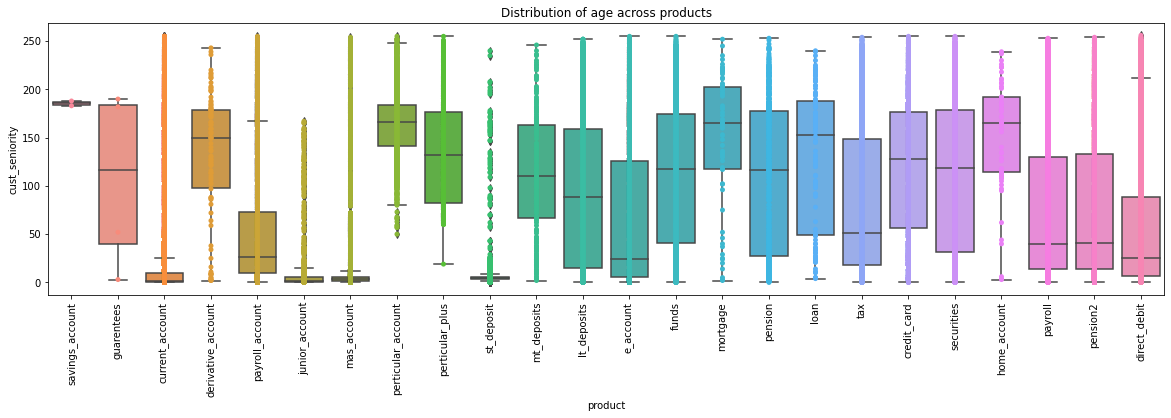

In [254]:
plt.figure(figsize = (20,5))
plt.title("Distribution of age across products")
sn.stripplot(x=df.columns[1], y = df.columns[0],data = df, jitter = False, dodge=True)
sn.boxplot(x=df.columns[1], y = df.columns[0], data = df)
plt.xticks(rotation = 90)
plt.show()

- old customers bought loans and mortgates
- new cutomers are mostly current, junior, mas, st-terms - ties with earlier conclusion

### indrel

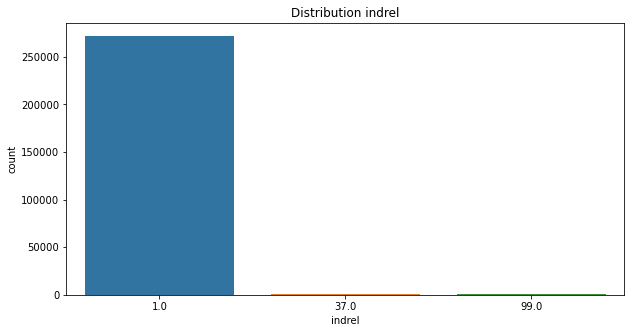

In [255]:
plt.figure(figsize = (10,5))
plt.title("Distribution indrel")
sn.countplot(user_features['indrel'])
plt.show()

In [258]:
user_features.indrel.value_counts()

1.0     271776
37.0       623
99.0       413
Name: indrel, dtype: int64

In [294]:
user_features.indrel[user_features.indrel == 37] = 1

In [262]:
user_features.indrel.value_counts()

1.0     272399
99.0       413
Name: indrel, dtype: int64

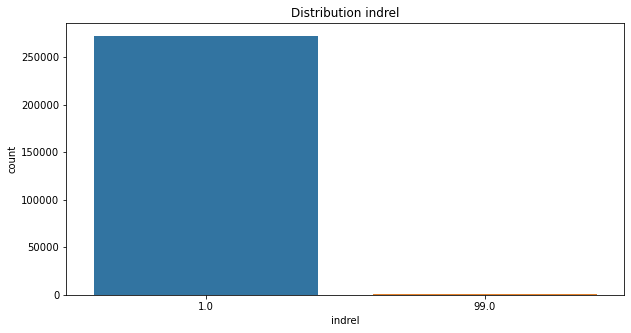

In [263]:
plt.figure(figsize = (10,5))
plt.title("Distribution indrel")
sn.countplot(user_features['indrel'])
plt.show()

In [264]:
print("missing age proportion", len(user_features[user_features.indrel == 1])/user_features.shape[0])

missing age proportion 0.9984861369734469


- most cutomers are primary

### cust_type

In [274]:
user_features.cust_type.value_counts()

1       179547
1.0      89459
nan       1521
3          651
37.0       623
3.0        340
2          245
5          241
2.0        100
4           66
4.0         19
Name: cust_type, dtype: int64

In [268]:
user_features.cust_type.plot(kind='bar')

TypeError: no numeric data to plot

In [278]:
user_features.cust_type[user_features.cust_type == '1.0']

Series([], Name: cust_type, dtype: object)

In [277]:
user_features.cust_type[user_features.cust_type == 'P'] = '5'
user_features.cust_type[user_features.cust_type == '1.0'] = '1'
user_features.cust_type[user_features.cust_type == '2.0'] = '2'
user_features.cust_type[user_features.cust_type == '3.0'] = '3'
user_features.cust_type[user_features.cust_type == '4.0'] = '4'

user_features.cust_type = user_features.cust_type.astype(str)

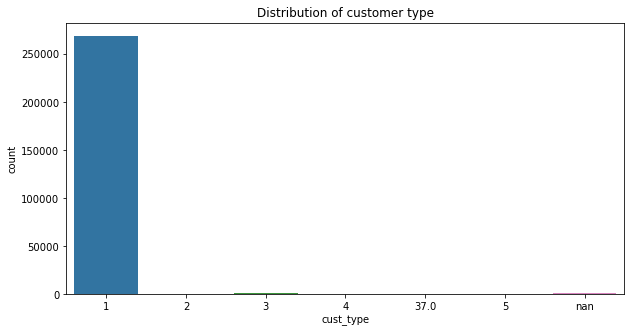

In [279]:
plt.figure(figsize = (10,5))
plt.title("Distribution of customer type")
sn.countplot(user_features['cust_type'])
plt.show()

- most customers are primary ties up with our previous statement

### customer relation

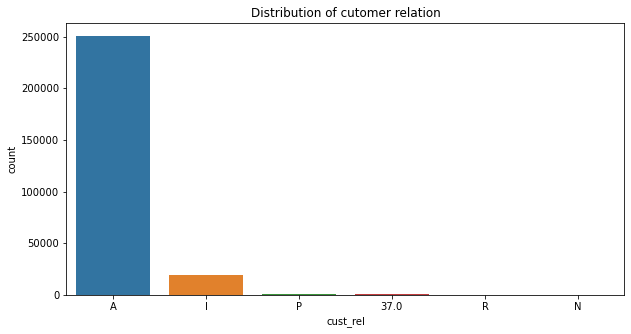

In [284]:
plt.figure(figsize = (10,5))
plt.title("Distribution of cutomer relation")
sn.countplot(user_features['cust_rel'])
plt.show()

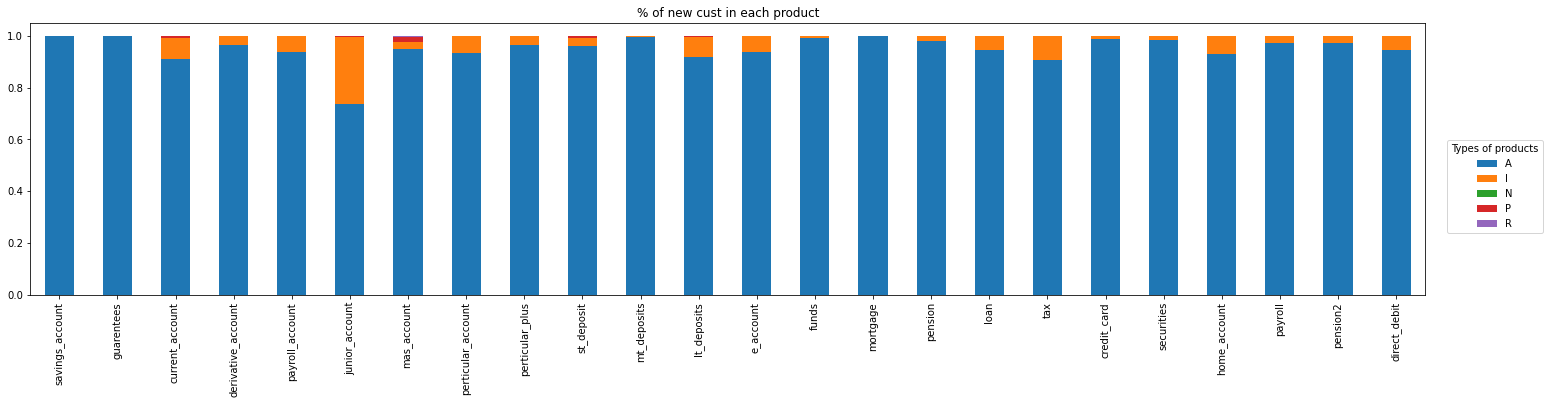

In [285]:
p = user_features[user_features.new_cust != 37.0].groupby('cust_rel')[target_columns].sum()
p = p/p.sum()
p = p.T

p.plot(kind='bar', stacked = True,figsize=(25,5))
plt.legend(loc='center',title = 'Types of products',bbox_to_anchor=(1.05, 0.4))
plt.title("% of new cust in each product")
plt.show()

- inactive cutomer are mainly from junior account

### Joining Channel

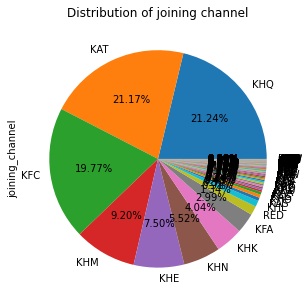

In [286]:
plt.figure(figsize = (20,5))
plt.title("Distribution of joining channel")
user_features.joining_channel.value_counts().plot(kind='pie',autopct = '%1.2f%%')
plt.show()

In [287]:
user_features.joining_channel = user_features.joining_channel.astype(str)
value_counts = user_features.joining_channel.value_counts()
dummy = user_features.drop('cust_code', axis=1).groupby('joining_channel')[target_columns].sum().sum(axis=1)
dummy = dummy.sort_values(ascending=False)

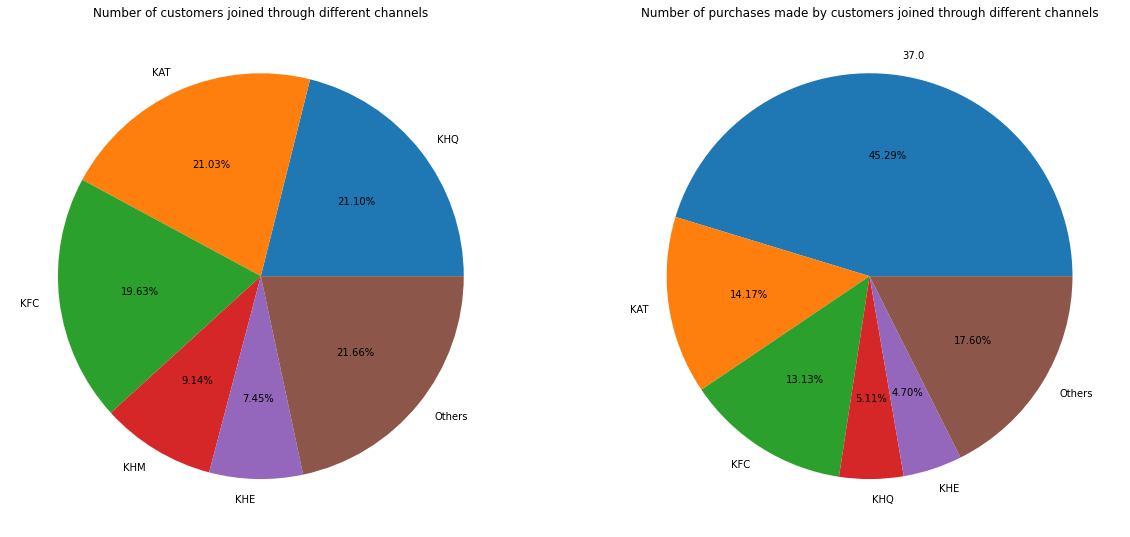

In [288]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.title('Number of customers joined through different channels')
plt.pie(list(value_counts.values[:5])+[value_counts.values[5:].sum()], labels = list(value_counts.index[:5])+['Others'], autopct='%1.2f%%')
plt.subplot(1,2,2)
plt.title('Number of purchases made by customers joined through different channels')
plt.pie(list(dummy.values[:5])+[dummy.values[5:].sum()], labels = list(dummy.index[:5])+['Others'], autopct='%1.2f%%')
plt.show()

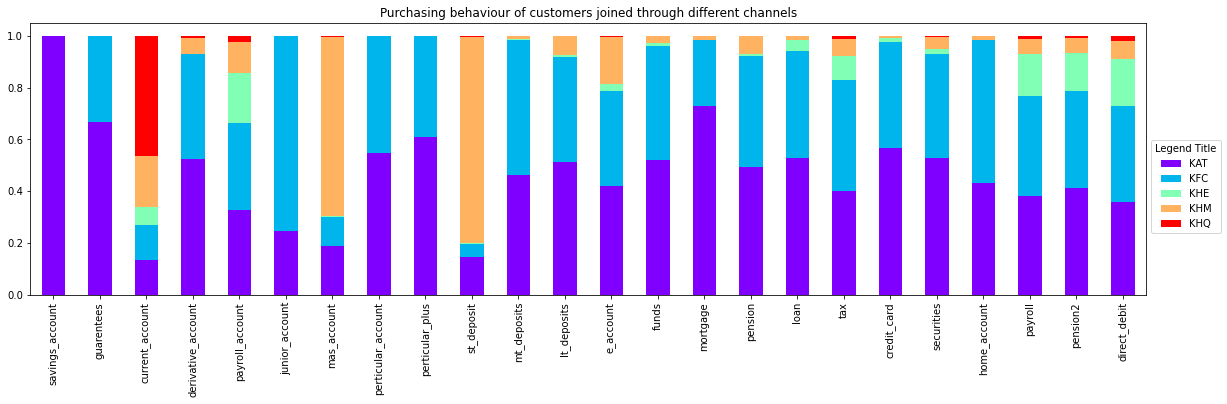

In [289]:
dummy = user_features.drop('cust_code', axis=1).groupby('joining_channel')[target_columns].sum()
dummy = dummy[dummy.index.isin(value_counts.keys()[:5])]
dummy = (dummy/dummy.sum()).T
dummy.plot(kind='bar',stacked=True, colormap='rainbow',figsize=(20,5))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Purchasing behaviour of customers joined through different channels')
plt.show()

- KAT has highet purchaes
- KHM domintaes in mas,shor term account

### deceased

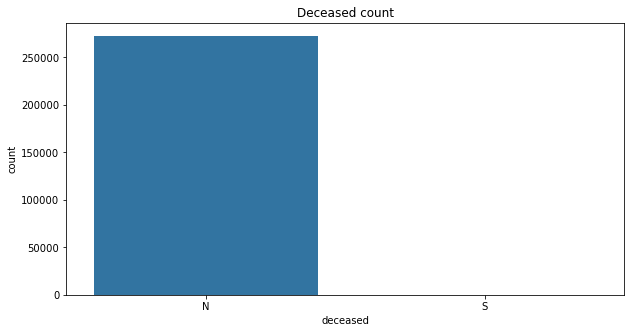

In [297]:
plt.figure(figsize = (10,5))
plt.title("Deceased count")
sn.countplot(user_features['deceased'])
plt.show()

In [296]:
user_features.deceased[user_features.deceased == 37] = 'N'

### Prov name

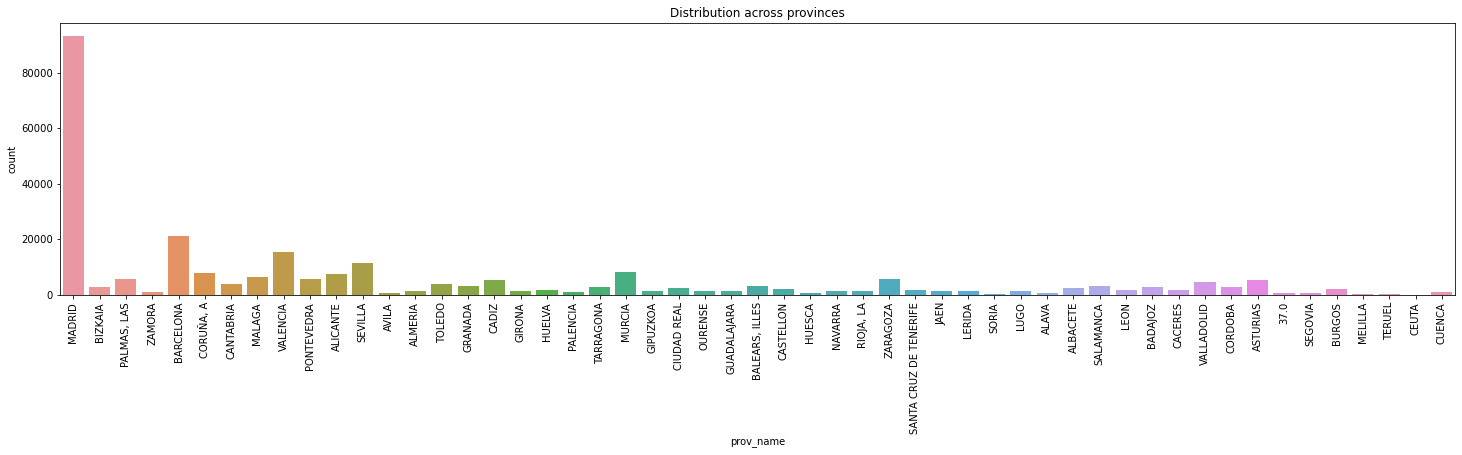

In [300]:
plt.figure(figsize = (25,5))
plt.title("Distribution across provinces")
sn.countplot(user_features['prov_name'])
plt.xticks(rotation = 90)
plt.show()

- Madrid has highest cutomers (spain capita effect)
- following are barcelona, Sevilla, Valencia

### income

<function matplotlib.pyplot.show(close=None, block=None)>

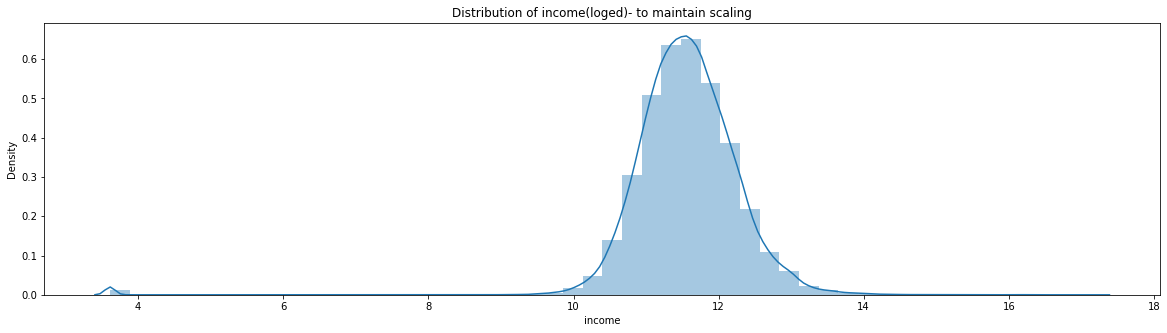

In [307]:
plt.figure(figsize = (20,5))
plt.title("Distribution of income(loged)- to maintain scaling")
sn.distplot(np.log(user_features.income[~user_features.income.isna()]))
plt.show

In [306]:
print(' income missing is {:.2f}%'.format(len(user_features[user_features.income.isna()]) * 100 / len(user_features)))

 income missing is 34.07%


- lets reconsider this shoul i keep it or remove it

In [310]:
df = pd.DataFrame(columns = ['income','product'])
for col in target_columns:
    df1 = pd.DataFrame({'income':np.log(user_features.income[(user_features[col]==1) & (~user_features.income.isna())]), 'product':col})
    df = pd.concat([df, df1])

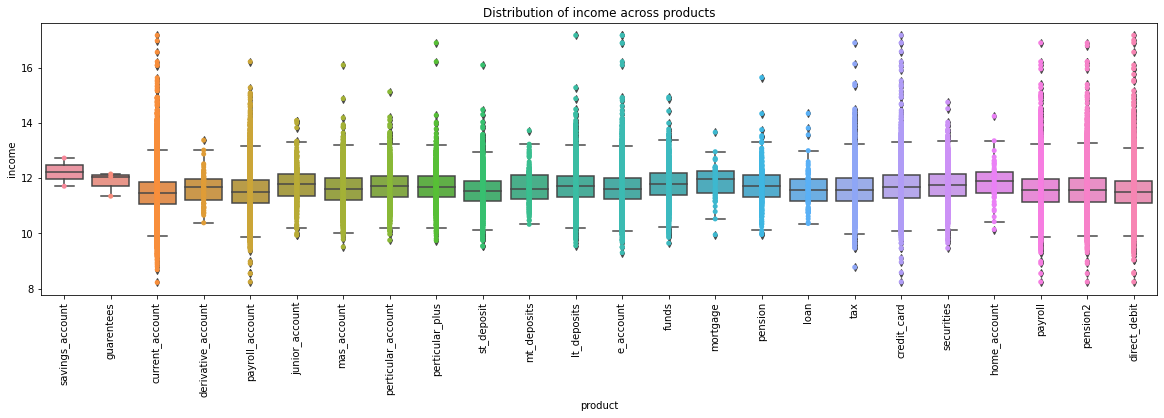

In [311]:
plt.figure(figsize = (20,5))
plt.title("Distribution of income across products")
sn.stripplot(x=df.columns[1], y = df.columns[0],data = df, jitter = False, dodge=True)
sn.boxplot(x=df.columns[1], y = df.columns[0], data = df)
plt.xticks(rotation = 90)
plt.show()

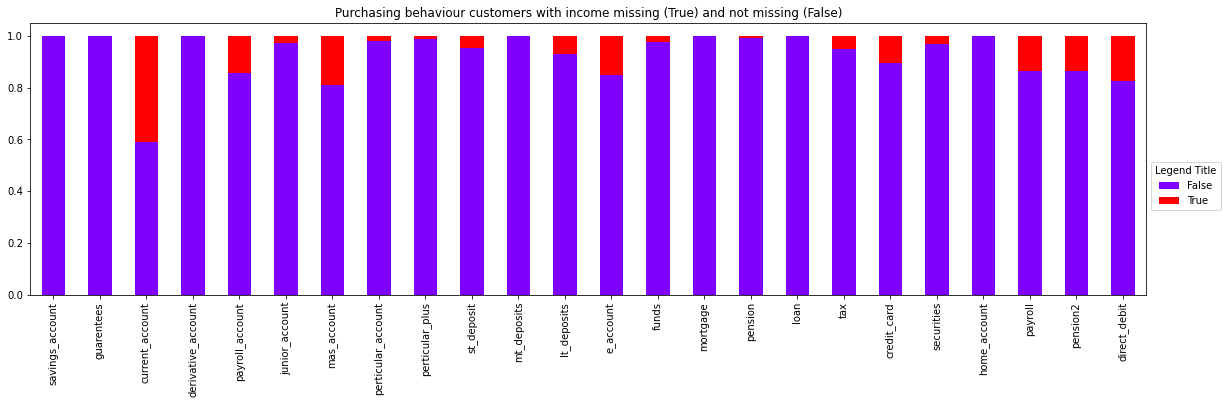

In [312]:
user_features['null_income'] = user_features.income.isna()
dummy = user_features.drop('cust_code', axis=1).groupby('null_income')[target_columns].sum()
dummy = (dummy/dummy.sum()).T
dummy.plot(kind='bar',stacked=True, colormap='rainbow',figsize=(20,5))
plt.legend(loc='center left', title='Legend Title', bbox_to_anchor=(1, .4))
plt.title('Purchasing behaviour customers with income missing (True) and not missing (False)')
plt.show()

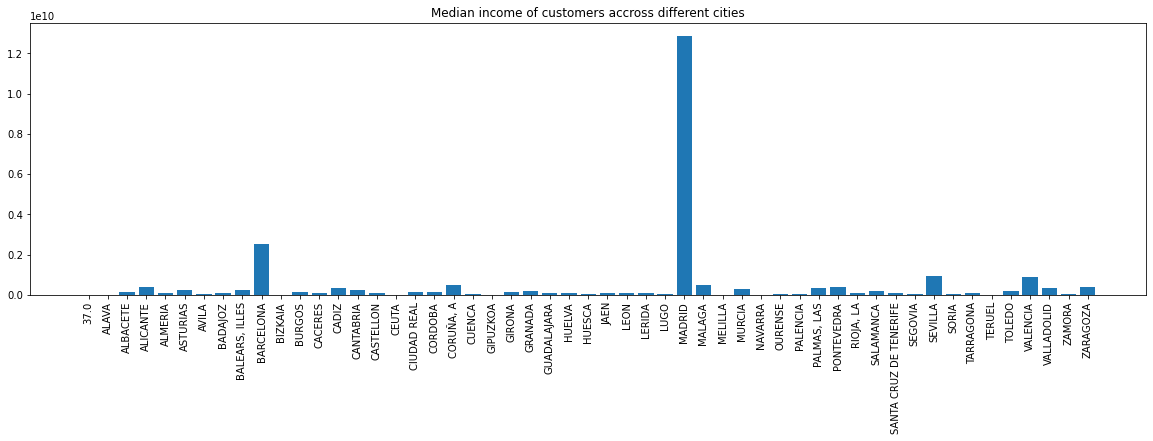

In [318]:
dummy = user_features[['income', 'prov_name']].groupby('prov_name').sum()
plt.figure(figsize=(20,5))
plt.bar(range(len(dummy)), dummy.income.values)
plt.title('Median income of customers accross different cities')
plt.xticks(np.arange(53),list(dummy.index), rotation = 90)
plt.show()

- missing income - means junior or means account
- income is log normal distribution
- high income is in madrid

### Segmentation

In [322]:
user_features.segmentation.isnull().sum()

1850

In [326]:
user_features.segmentation.value_counts(dropna=False)

02 - PARTICULARES     158353
03 - UNIVERSITARIO     87792
01 - TOP               24194
NaN                     1850
37.0                     623
Name: segmentation, dtype: int64

In [330]:
segmentation_mode = user_features.segmentation.mode()[0]

In [331]:
user_features.segmentation[((user_features.segmentation == 37) | (user_features.segmentation.isnull()))] = segmentation_mode

In [332]:
user_features.segmentation.value_counts(dropna=False)

02 - PARTICULARES     160826
03 - UNIVERSITARIO     87792
01 - TOP               24194
Name: segmentation, dtype: int64

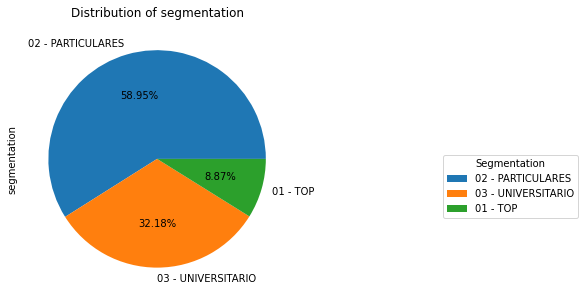

In [344]:
plt.figure(figsize = (20,5))
plt.title("Distribution of segmentation")
user_features.segmentation.value_counts().plot(kind='pie',autopct = '%1.2f%%')
plt.legend(loc = 'center', title = 'Segmentation',bbox_to_anchor=(1.8,0.4))
plt.show()

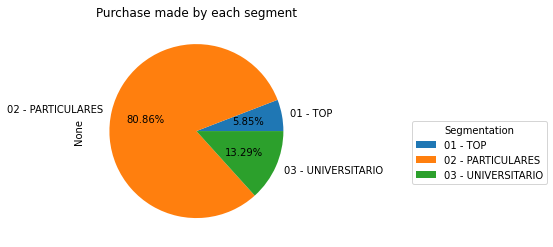

In [343]:
purchases = user_features.groupby('segmentation').sum()[target_columns].sum(axis=1)
purchases.plot(kind='pie',autopct='%1.2f%%')
plt.title("Purchase made by each segment")
plt.legend(loc = 'center', title = 'Segmentation',bbox_to_anchor=(1.8,0.4))
plt.show()

In [323]:
user_features.isnull().sum()

cust_code                  0
emp_index                  0
country                    0
sex                        2
age                        0
cust_date                  0
new_cust                   0
cust_seniority             0
indrel                     0
cust_type                  0
cust_rel                1521
residence_index            0
foreigner_index            0
spouse_index          272005
joining_channel            0
deceased                   0
address_type               0
prov_code                497
prov_name                497
activity_index             0
income                 92937
segmentation            1850
savings_account            0
guarentees                 0
current_account            0
derivative_account         0
payroll_account            0
junior_account             0
mas_account                0
perticular_account         0
perticular_plus            0
st_deposit                 0
mt_deposits                0
lt_deposits                0
e_account     

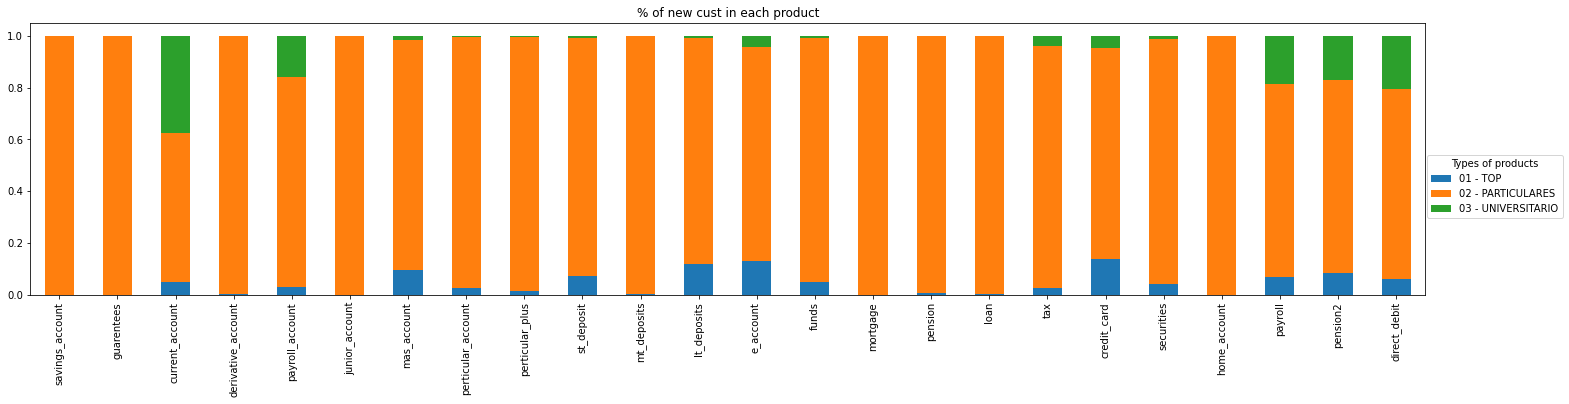

In [341]:
p = user_features.groupby('segmentation')[target_columns].sum()
p = p/p.sum()
p = p.T

p.plot(kind='bar', stacked = True,figsize=(25,5))
plt.legend(loc='center',title = 'Types of products',bbox_to_anchor=(1.05, 0.4))
plt.title("% of new cust in each product")
plt.show()

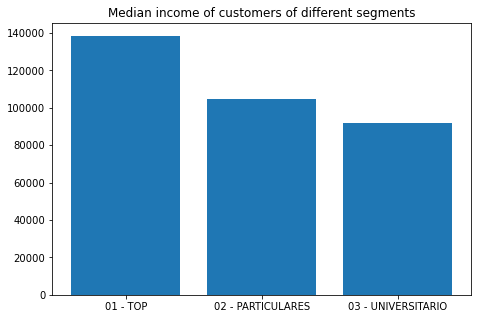

In [348]:
dummy = user_features[['income', 'segmentation']].groupby('segmentation').median()
plt.figure(figsize=(7.5,5))
plt.title('Median income of customers of different segments')
plt.bar(range(len(dummy)), dummy.income)
plt.xticks(np.arange(len(dummy)),list(dummy.index))
plt.show()

- Particulares are very high
- Top has highest average income
- most products are completely Particulares


### Products

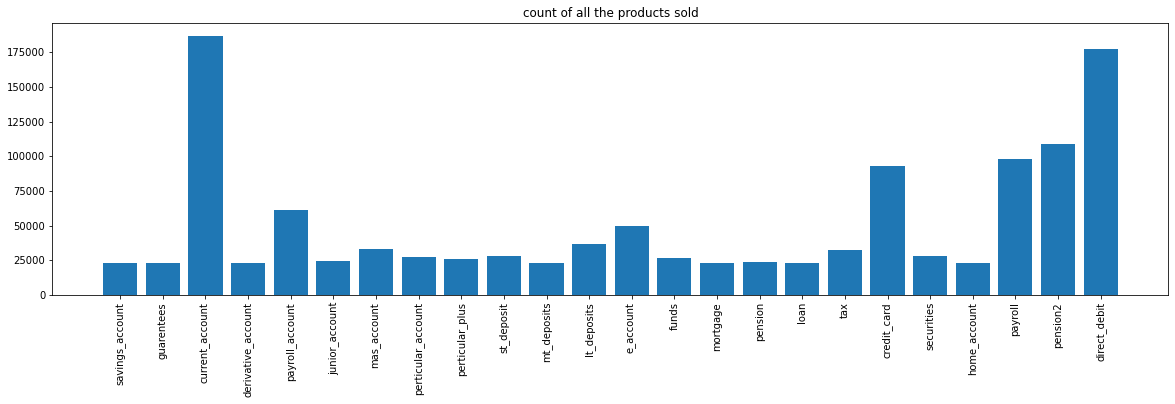

In [349]:
plt.figure(figsize=(20,5))
plt.title('count of all the products sold')
plt.bar(range(len(target_columns)), user_features[target_columns].sum())
plt.xticks(np.arange(len(target_columns)),list(target_columns))
plt.xticks(rotation = 90)
plt.show()

In [353]:
for i in target_columns:
    print(i)
    print(user_features[i].value_counts())
    print()

savings_account
0     272187
37       623
1          2
Name: savings_account, dtype: int64

guarentees
0     272185
37       623
1          4
Name: guarentees, dtype: int64

current_account
1     139019
0     122608
2       7951
3       1840
37       623
4        595
5        144
6         30
7          2
Name: current_account, dtype: int64

derivative_account
0     272071
37       623
1        102
2         12
3          2
5          1
4          1
Name: derivative_account, dtype: int64

payroll_account
0     239979
1      28354
2       2451
3        866
37       623
4        393
5        126
6         20
Name: payroll_account, dtype: int64

junior_account
0     270967
1       1188
37       623
2         23
3          8
4          2
6          1
Name: junior_account, dtype: int64

mas_account
0     262675
1       9370
37       623
2        125
3         11
4          7
5          1
Name: mas_account, dtype: int64

perticular_account
0     269026
1       2676
37       623
2        317


In [358]:
for i in target_columns:
    user_features[i][user_features[i] == 37] = 0

In [359]:
for i in target_columns:
    print(i)
    print(user_features[i].value_counts())
    print()

savings_account
0    272810
1         2
Name: savings_account, dtype: int64

guarentees
0    272808
1         4
Name: guarentees, dtype: int64

current_account
1    139019
0    123231
2      7951
3      1840
4       595
5       144
6        30
7         2
Name: current_account, dtype: int64

derivative_account
0    272694
1       102
2        12
3         2
5         1
4         1
Name: derivative_account, dtype: int64

payroll_account
0    240602
1     28354
2      2451
3       866
4       393
5       126
6        20
Name: payroll_account, dtype: int64

junior_account
0    271590
1      1188
2        23
3         8
4         2
6         1
Name: junior_account, dtype: int64

mas_account
0    263298
1      9370
2       125
3        11
4         7
5         1
Name: mas_account, dtype: int64

perticular_account
0    269649
1      2676
2       317
3       101
4        46
5        17
6         6
Name: perticular_account, dtype: int64

perticular_plus
0    270828
1      1663
2       235
3   

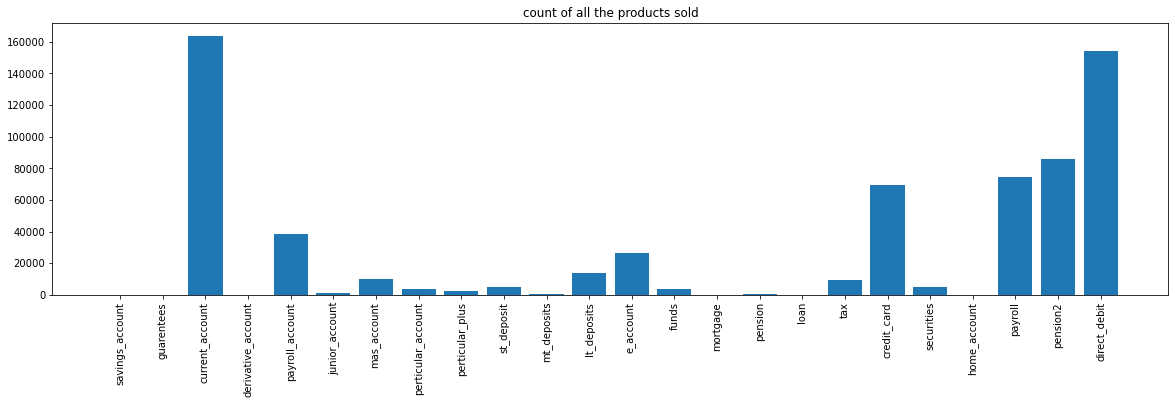

In [360]:
plt.figure(figsize=(20,5))
plt.title('count of all the products sold')
plt.bar(range(len(target_columns)), user_features[target_columns].sum())
plt.xticks(np.arange(len(target_columns)),list(target_columns))
plt.xticks(rotation = 90)
plt.show()

- Current, Direct, pension, payroll are most popular
- savings, gaurentees, derivative, mortagea, loan, pension, home account are least sold products